<a href="https://colab.research.google.com/github/ekqlsrla/ESAA-2/blob/main/HW/1128_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_CH3_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬 딥러닝 텐서플로**
---

## **| 01** 딥러닝 준비

1. 케라스
  * 딥러닝 라이브러리를 쉽고 간결한 코드로 실행할 수 있게 만들어 줌
  * 직관적이고 사용자 친화적
  * 복잡한 구조의 모델 구현과 사용자정의 훈련을 위해서는 텐서플로의 저수준 API를 활용해야 한다는 한계점

### 1. 주요 용어

1. **하이퍼파라미터** : 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값
  * 하이퍼파라미터 튜닝 : 하이퍼파라미터의 값을 조절하는 행위

2. **과소적합 VS 과대적합**

* 훈련용 데이터 : 머신러닝 모델이 학습할 데이터
* 예측용 데이터 : 정답 레이블이 없는 머신러닝 모델이 예측해야 하는 대상 데이터
* 과소적합 : 모델이 충분히 학습되지 않아 예측 성능이 떨어지는 경우
* 과대적합 : 학습 데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태

3. 에포크
: 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프를 **1 epoch**라고 함

4. 손실함수 : 예측 값과 정답 값의 차이 또는 오차

5. 경사 하강법 : 모델 내부의 **가중치**에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

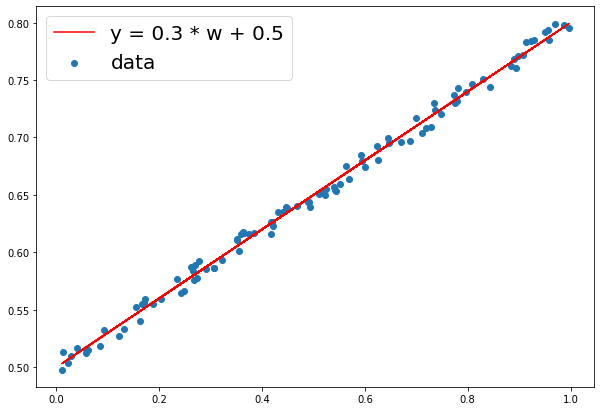

w: 0.3, b: 0.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_linear(w = 0.5, b = 0.8, size = 50, noise = 1.0) :
  x = np.random.rand(size)
  y = w* x + b
  noise = np.random.uniform(-abs(noise),abs(noise),size = y.shape)
  yy = y + noise
  plt.figure(figsize = (10,7))
  plt.plot(x,y,color = 'r', label = f'y = {w} * w + {b}')
  plt.scatter(x,yy,label = 'data')
  plt.legend(fontsize = 20)
  plt.show()
  print(f'w: {w}, b: {b}')
  return x,yy

x,y = make_linear(w = 0.3,b = 0.5,size = 100, noise = 0.01)

In [2]:
#최대 반복 횟수
num_epoch = 1000

learning_rate = 0.005

errors = []

w = np.random.uniform(low = 0.0,high = 1.0)
b = np.random.uniform(low = 0.0, high = 1.0)

for epoch in range(num_epoch) :
  y_hat = w*x+b
  error = 0.5 * ((y_hat - y)**2).sum()
  if error < 0.005 :
    break
  #Gradient 미분 계산
  w = w-learning_rate * ((y_hat - y)* x).sum()
  b = b - learning_rate * (y_hat - y).sum()

  errors.append(error)

  if epoch % 5 == 0 :
    print("{0:2} w = {1:.5f},b = {2:.5f} error = {3:.5f}".format(epoch,w,b,error))

print('_____' * 15)
print("{0:2} w = {1:.1f},b = {2:.1f} error = {3:.5f}".format(epoch,w,b,error))



 0 w = 0.25680,b = 0.56266 error = 0.59166
 5 w = 0.24933,b = 0.52695 error = 0.01317
10 w = 0.25680,b = 0.52274 error = 0.01006
15 w = 0.26327,b = 0.51933 error = 0.00781
20 w = 0.26880,b = 0.51642 error = 0.00617
___________________________________________________________________________
25 w = 0.3,b = 0.5 error = 0.00497


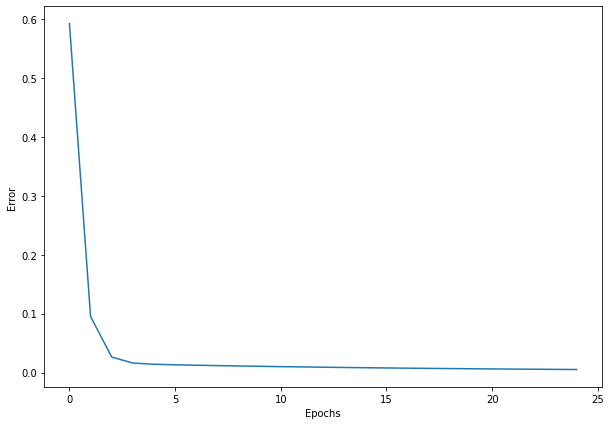

In [3]:
plt.figure(figsize = (10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### 2. 딥러닝 프로세스

---
**데이터 로드** -> **데이터 전처리** : 특성 공학 / 특성 선택 / 특성 추출 -> **데이터분할** -> **모델 생성&컴파일** -> **훈련** -> **검증** -> **예측**

---

1. 데이터 전처리 : 데이터를 모델에 주입하기전에 데이터를 가공하는 단계

2. 모델 생성 : 모델의 구조를 정의하고 생성하는 단계

3. 모델 컴파일 : 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등 정의

4. 모델 훈련 : 모델을 훈련하는 단계

5. 모델 검증 : 훈련이 완료된 모델을 검증하는 단계
  * 사용하지 않은 **검증 데이터셋**을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표 계산

6. 모델 예측 : 훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과 반환




---
## **| 02**  단순 신경망 훈련

### 1. 선형 회귀 

$$ y = wx + b$$
* w : 가중치
* b : 편향

### 2. 뉴런 (Neuron)

* 인공 신경망 모델을 구성하는 하나의 신경 의미
* 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨

### 3. Dense 레이어 : 심층 신경망 모델을 구성하는 가장 기본 레이어
* **완전 연결층** : 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있음

In [4]:
import tensorflow as tf

#10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10,activation = 'relu')

### 4. 데이터셋 만들기



In [5]:
x = np.arange(1,6)

y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


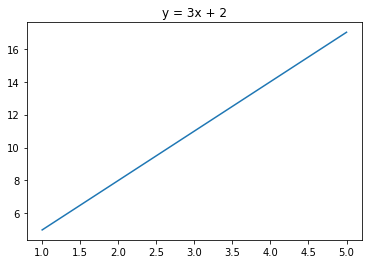

In [6]:
#시각화

import matplotlib.pyplot as plt

plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

### 5. Sequential API

1. 모델 구조

In [7]:
import tensorflow as tf

#리스트형

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

#add함수로 레이어 추가

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

2. 입력 데이터 형태

* 첫번째 층 : input_shape 매개변수 지정



In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

3. 단순선형 회귀 모델 정의

* 1개의 뉴런을 가지는 **Dense 레이어** 한개 사용

In [9]:
#단순선형회귀 모델 생성

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = [1])
])

### 6. 모델 요약

* `Total params` : 모델 내부에 존재하는 모든 파라미터의 합계
* `Trainable params` : 모델 훈련 시 업데이트할 파라미터의 총 개수
* `Non-trainable params` : 훈련 시 업데이트하지 않을 파라미터의 총 개수


### 7. 컴파일

In [10]:
#긴 문자열 지정
model.compile(optimizer = 'sgd', loss = 'mean_squared_error',metrics = ['mean_squared_error','mean_absolute_error'])

#짧은 문자열 지정
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse','mae'])

#클래스 인스턴스 지정
model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.005),
              loss = tf.keras.losses.MeanAbsoluteError(),
              metrics = [tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanSquaredError()])

#컴파일
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### 8. 훈련



* 반복 훈련 횟수가 충분하지 않아 학습이 덜 되었음 -> **과소적합 상태**

In [11]:
model.fit(x,y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 852ms/step - loss: 150.4472 - mae: 11.4315
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 87.7553 - mae: 8.7680
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 51.2211 - mae: 6.7345
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 29.9302 - mae: 5.1821
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 17.5224 - mae: 3.9968


In [12]:
#단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape = [1])
])

#컴파일
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

#훈련
history = model.fit(x,y,epochs = 1200)

Epoch 1/1200
1/1 [==============================] - 0s 379ms/step - loss: 160.0729 - mae: 11.7818
Epoch 2/1200
1/1 [==============================] - 0s 19ms/step - loss: 93.3601 - mae: 9.0341
Epoch 3/1200
1/1 [==============================] - 0s 9ms/step - loss: 54.4827 - mae: 6.9365
Epoch 4/1200
1/1 [==============================] - 0s 9ms/step - loss: 31.8263 - mae: 5.3351
Epoch 5/1200
1/1 [==============================] - 0s 10ms/step - loss: 18.6228 - mae: 4.1125
Epoch 6/1200
1/1 [==============================] - 0s 19ms/step - loss: 10.9279 - mae: 3.1790
Epoch 7/1200
1/1 [==============================] - 0s 10ms/step - loss: 6.4432 - mae: 2.4663
Epoch 8/1200
1/1 [==============================] - 0s 12ms/step - loss: 3.8292 - mae: 1.9221
Epoch 9/1200
1/1 [==============================] - 0s 9ms/step - loss: 2.3054 - mae: 1.5065
Epoch 10/1200
1/1 [==============================] - 0s 10ms/step - loss: 1.4169 - mae: 1.1891
Epoch 11/1200
1/1 [==============================] - 

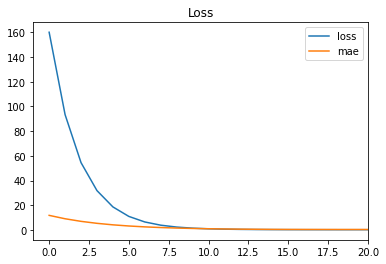

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['mae'],label = 'mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

### 9. 검증

In [14]:
model.evaluate(x,y)

1/1 [==============================] - 0s 171ms/step - loss: 5.5749e-05 - mae: 0.0064


[5.574927126872353e-05, 0.006408882327377796]

### 10. 예측

In [15]:
model.predict([10])

1/1 [==============================] - 0s 300ms/step


array([[32.030975]], dtype=float32)

---
## **| 03** 심층 신경망으로 이미지 분류

### 1. 케라스 내장 데이터셋 로드

In [16]:
#내장 데이터셋 mnist 데이터셋 로드
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [17]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [18]:
print('train set : ', x_train.shape, y_train.shape)
print('test set :', x_test.shape, y_test.shape)

train set :  (60000, 28, 28) (60000,)
test set : (10000, 28, 28) (10000,)


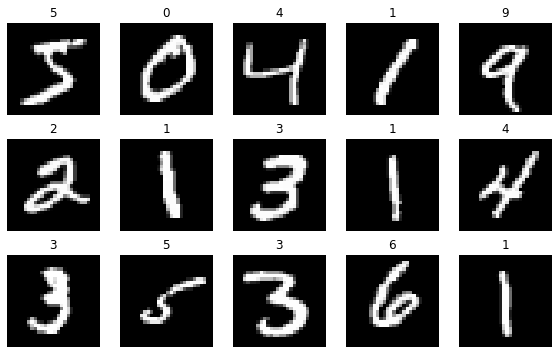

In [19]:
#데이터 시각화
import matplotlib.pyplot as plt

fig,axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15) :
  ax = axes[i//5, i%5]
  ax.imshow(x_train[i], cmap = 'gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 2. 데이터 전처리

In [20]:
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [21]:
#데이터 정규화

print(f'정규화 전] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')
x_train = x_train/ x_train.max()

print(f'정규화 후] 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

정규화 전] 최소값 : 0, 최대값 : 255
정규화 후] 최소값 : 0.0, 최대값 : 1.0


In [22]:
#테스트 셋에도 정규화 동일 적용
x_test = x_test/x_test.max()

In [23]:
#x_train 배열의 데이터 확인

x_train[0,10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3. Flatten 레이어

In [24]:
print(f'변경 전 shape : {x_train.shape}')
print(f'1D으로 shape 변경 후 : {x_train.reshape(60000,-1).shape}')

변경 전 shape : (60000, 28, 28)
1D으로 shape 변경 후 : (60000, 784)


In [25]:
#flatten 레이어 사용하여 1차원으로 만들기

print(f'변경 전 shape : {x_train.shape}')
print(f'Flatten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape : (60000, 28, 28)
Flatten 적용 후 : (60000, 784)


### 4. 활성화 함수

* 입력을 비선형 출력으로 변환해주는 함수
* 시그모이드, 하이퍼볼릭 탄젠트, ReLU, Leaky ReLU

In [26]:
#Dense 레이어에 relu 활성화 함수를 적용
tf.keras.layers.Dense(128,activation = 'relu')

In [27]:
#Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 5. 입력과 출력

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax'),
])

In [29]:
#출력츨 노드 = 1개인 경우 ,sigmoid
tf.keras.layers.Dense(1,activation = 'sigmoid')

#출력층 노드 = 2개인 경우 , softmax
tf.keras.layers.Dense(10,activation = 'softmax')

### 6. 손실함수

* 손실함수의 종류

|마지막 출력층|Loss|
|---|---|
|Dense(1,actiavtion = 'sigmoid')|loss = 'binary_crossentropy'|
|Dense(2이상, activation = 'softmax')|loss = 'categorical_crossentropy', loss = 'sparse_categorical_crossentropy'|

```
#출력노드 개수 = 1, sigmoid인 경우

model.compile(loss = 'binary_crossentropy')
```

In [30]:
#y가 원핫벡터인경우
model.compile(loss = 'categorical_crossentropy')

#y가 원핫벡터가 아닌 경우
model.compile(loss = 'sparse_categorical_crossentropy')

### 7. 옵티마이저

* 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법
*SGD/ Adam / Adagrad / Nadam / RMSprop / Adadelta / Adamax / Ftrl

In [34]:
#클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam)

#문자열로 지정
model.compile(optimizer = 'adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 8. 평가지표
* 'accuracy/ auc / precision / recall

In [35]:
#클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = [acc])

In [ ]:
#문자열로 지정

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### 9. 훈련

In [36]:
model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0475 - sparse_categorical_accuracy: 0.9878 - val_loss: 0.1048 - val_sparse_categorical_accuracy: 0.9766
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0370 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.0977 - val_sparse_categorical_accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0343 - sparse_categorical_accuracy: 0.9895 - val_loss: 0.1072 - val_sparse_categorical_accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0293 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.0981 - val_sparse_categorical_accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0282 - sparse_categorical_accuracy: 0.9918 - val_loss: 0.1296 - val_sparse_categorical_accuracy: 0.9731
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0242 - sp

### 10. 평가

In [37]:
#검증

test_loss, test_acc = model.evaluate(x_test,y_test)

print('검증 셋 정확도 : ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9797
검증 셋 정확도 :  0.9797000288963318


### 11. 예측

In [38]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [39]:
predictions[0]

array([2.74747354e-21, 3.33374495e-10, 1.06115616e-10, 1.41973146e-07,
       1.32094140e-08, 6.97940349e-13, 5.19423179e-22, 9.99999821e-01,
       8.54503794e-12, 2.10965485e-08], dtype=float32)

In [40]:
import numpy as np
print(np.argmax(predictions[0]))

print(np.argmax(predictions[:10], axis = 1))

7
[7 2 1 0 4 1 4 9 5 9]


<function matplotlib.pyplot.show(*args, **kw)>

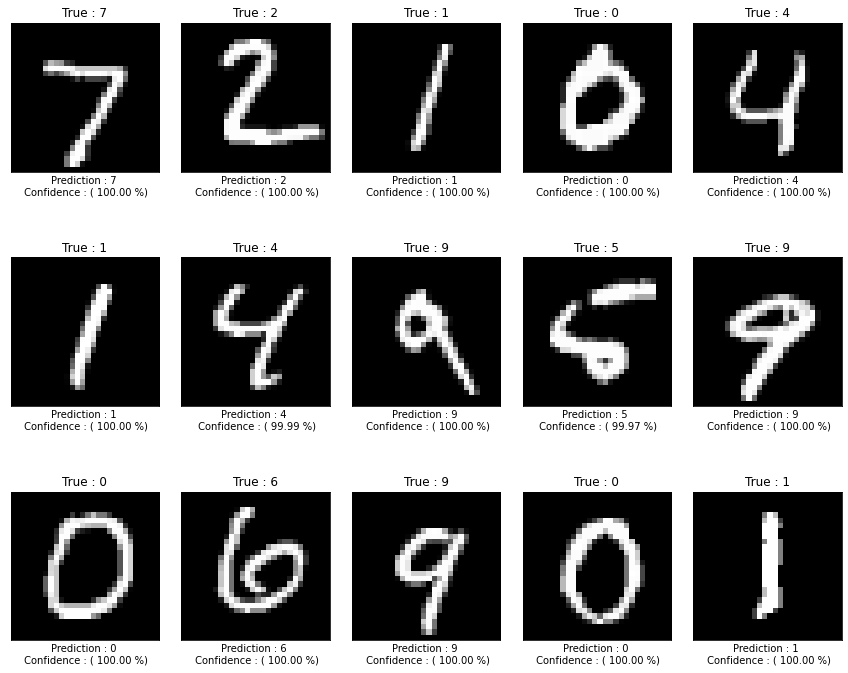

In [41]:
#시각화

import matplotlib.pyplot as plt
def get_one_result(idx) :
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])

  return img, y_true,y_pred,confidence

fig,axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15) :
  ax = axes[i//5, i%5]
  img,y_true, y_pred,confidence = get_one_result(i)
  ax.imshow(img,cmap = 'gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True : {y_true}')
  ax.set_xlabel(f'Prediction : {y_pred} \n Confidence : ({confidence : .2f} %)')

plt.tight_layout()
plt.show

---
## **| 04** 모델 세부 설정

In [42]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

print('train set : ', x_train.shape, y_train.shape)
print('test set : ', x_test.shape, y_test.shape)

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

train set :  (60000, 28, 28) (60000,)
test set :  (10000, 28, 28) (10000,)


### 1. 초기값 설정

* 케라스에서 지원하는 자주 사용되는 초기화 목록
  * `glorot_normal`,`glorot_uniform` : 글로럿 초기화
  * `lecun_normal`,`lecun_uniform` : Yann Lecun 초기화
  * `he_normal` , `he_uniform` : He 초기화
  * `random_normal` ,`random_uniform` : 정규 분포, 연속균등 분포 초기화

In [43]:
dense  = tf.keras.layers.Dense(256,activation = 'relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [44]:
#문자열 초기화
dense = tf.keras.layers.Dense(256,kernel_initializer = 'he_normal', activation = 'relu')
print(dense.get_config()['kernel_initializer'])

#클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256,kernel_initializer = he_normal, activation = 'relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


### 2. 규제

In [45]:
#레이어에 규제를 적용하기 위해서는 별도로 설정해주어야 함

dense = tf.keras.layers.Dense(256,activation = 'relu')
dense.get_config()

{'name': 'dense_24',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [46]:
#L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer = 'l1', activation = 'relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha = 0.1 변경
regularizer = tf.keras.regularizers.l1(l1 = 0.1)
dense = tf.keras.layers.Dense(256,kernel_regularizer = regularizer, activation = 'relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


### 3. 드롭 아웃 (Dropout)

* 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어

In [47]:
tf.keras.layers.Dropout(0.25)

### 4. 배치 정규화

* 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화

In [48]:
#Model A : Dense + ReLU

model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax'),
])

model_a.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [50]:
#Model B : Dense + BatchNorm + ReLU

model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64),
    #배치 정규화
    tf.keras.layers.BatchNormalization(),
    #활성화 함수
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    #배치 정규화
    tf.keras.layers.BatchNormalization(),
    #활성화함수
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10,activation = 'softmax')
])

model_b.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

### 5. 활성화 함수

In [51]:
#LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

#LearkyReLU, alpha = 0.2
tf.keras.layers.LeakyReLU(alpha = 0.2)

In [54]:
#Model C : Dense + BatchNorm + LeakyReLU(0.2)

model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64),
    #배치 정규화
    tf.keras.layers.BatchNormalization(),
    #LeakyReLU,alpha = 0.2
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(32),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(10,activation = 'softmax'),
])

model_c.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                      

In [55]:
model_a.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model_b.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model_c.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

#Model A : Dense + ReLU
history_a = model_a.fit(x_train,y_train, validation_data = (x_test,y_test), epochs = 10)

#Model B : Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train,y_train, validation_data = (x_test,y_test), epochs = 10)

#Model C : Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train,y_train, validation_data = (x_test,y_test), epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2891 - accuracy: 0.9158 - val_loss: 0.1566 - val_accuracy: 0.9559
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1225 - accuracy: 0.9632 - val_loss: 0.1081 - val_accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0910 - accuracy: 0.9722 - val_loss: 0.0937 - val_accuracy: 0.9705
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0713 - accuracy: 0.9781 - val_loss: 0.1035 - val_accuracy: 0.9708
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0596 - accuracy: 0.9812 - val_loss: 0.0936 - val_accuracy: 0.9712
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.0878 - val_accuracy: 0.9729
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.0909 - val_accurac

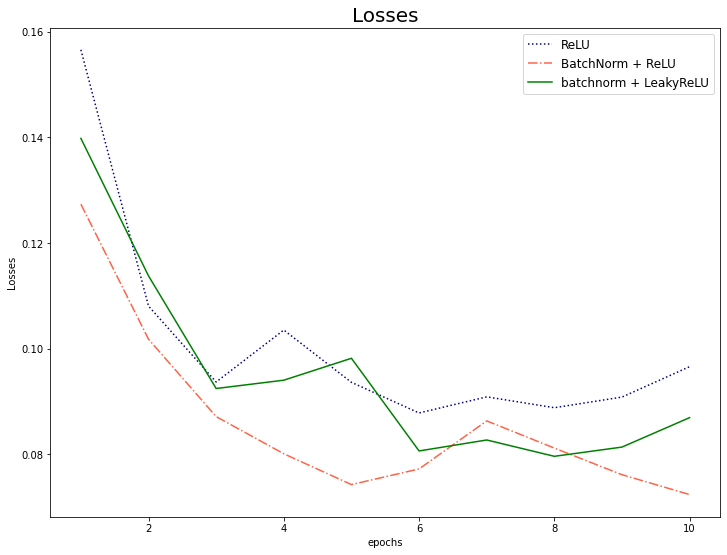

In [58]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (12,9))
plt.plot(np.arange(1,11),history_a.history['val_loss'], color = 'navy',linestyle = ':')
plt.plot(np.arange(1,11),history_b.history['val_loss'], color = 'tomato', linestyle = '-.')
plt.plot(np.arange(1,11), history_c.history['val_loss'], color = 'green', linestyle = '-')

plt.title('Losses',fontsize = 20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'],fontsize = 12)
plt.show()